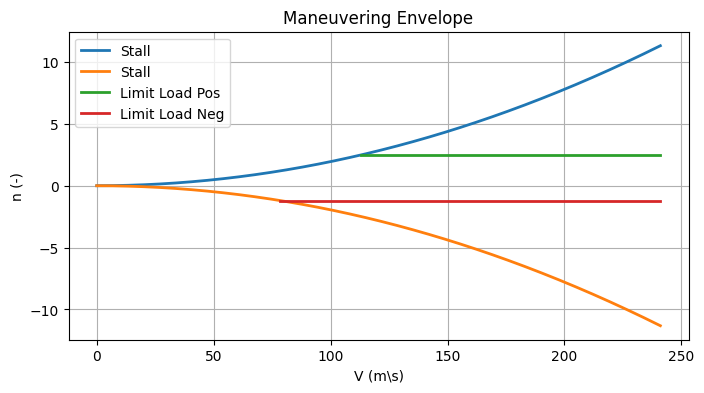

In [11]:
import numpy as np
import matplotlib.pyplot as plt

V = np.linspace(0, 241, 500)    #redo based on cruise speed
n_stall = 0.0001948*V**2        #redo based on density, lift coefficient, and wing loading
n_pos = np.array([2.5, 2.5])
n_neg = np.array([-1.2, -1.2])

pos_int_index = int(((np.sqrt(2.5 / 0.000198)) / 241) * 500) + 1
neg_int_index = int(((np.sqrt(1.2 / 0.000198)) / 241) * 500) + 1

pos_intersect = V[pos_int_index]
neg_intersect = V[neg_int_index]

V_pos_limits = np.array([pos_intersect, 241])
V_neg_limits = np.array([neg_intersect, 241])

plt.figure(figsize=(8,4))
plt.title('Maneuvering Envelope')
plt.xlabel("V (m\s)")
plt.ylabel("n (-)")
plt.plot(V,n_stall, label='Stall', linestyle='-', linewidth=2, marker=None, markersize=8)
plt.plot(V,-n_stall, label='Stall', linestyle='-', linewidth=2, marker=None, markersize=8)
plt.plot(V_pos_limits, n_pos, label='Limit Load Pos', linestyle='-', linewidth=2, marker=None, markersize=8)
plt.plot(V_neg_limits, n_neg, label='Limit Load Neg', linestyle='-', linewidth=2, marker=None, markersize=8)
plt.grid(True)
plt.legend(loc='best')
plt.show()